In [1]:
import spotify_auth
import pandas as pd
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
SPOTIPY_CLIENT_ID= spotify_auth.SPOTIPY_CLIENT_ID
SPOTIPY_CLIENT_SECRET=spotify_auth.SPOTIPY_CLIENT_SECRET
SPOTIPY_REDIRECT_URI=spotify_auth.SPOTIPY_REDIRECT_URI
SPOTIFY_USER_ID='stslogar920'

# SPOTIFY_USER_ID=spotify_auth.SPOTIFY_USER_ID

In [4]:
# scope = 'playlist-modify-public'
# username = SPOTIFY_USER_ID
# token = util.prompt_for_user_token(username, scope, SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET, SPOTIPY_REDIRECT_URI)
# spotify = spotipy.Spotify(auth=token)

In [3]:
client_credentials_manager = SpotifyClientCredentials(SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
featured = sp.featured_playlists(limit=20)

In [20]:
for playlist in featured['playlists']['items']:
    print(playlist['name'], playlist['uri'])

New Music Friday spotify:playlist:37i9dQZF1DWXJfnUiYjUKT
Dance Party spotify:playlist:37i9dQZF1DXaXB8fQg7xif
Mega Hit Mix spotify:playlist:37i9dQZF1DXbYM3nMM0oPk
Girls' Night spotify:playlist:37i9dQZF1DX0Uv9tZ47pWo
Kickass Metal spotify:playlist:37i9dQZF1DWTcqUzwhNmKv
Rock Party spotify:playlist:37i9dQZF1DX8FwnYE6PRvL
All The Feels spotify:playlist:37i9dQZF1DX7gIoKXt0gmx
Are & Be spotify:playlist:37i9dQZF1DX4SBhb3fqCJd
Sing-Along Indie Hits spotify:playlist:37i9dQZF1DWYBF1dYDPlHw
Get Turnt spotify:playlist:37i9dQZF1DWY4xHQp97fN6
Ambient Relaxation spotify:playlist:37i9dQZF1DX3Ogo9pFvBkY
Hanging Out and Relaxing spotify:playlist:37i9dQZF1DXci7j0DJQgGp


In [5]:
newMusicID = featured['playlists']['items'][0]['id'] #['uri']

In [6]:
newMusicPlaylist = sp.playlist_tracks(newMusicID)

In [7]:
count = 0
# songs = []
songs = {}
for song in newMusicPlaylist['items']:
    if song['track'] is not None:
#         songs.append(song['track']['name'])
        songs[song['track']['name']] = song['track']['id']
    count = count + 1

In [8]:
tracks = []
for key in songs:
    uri = 'spotify:track:'+songs[key]
    tracks.append(uri)

In [9]:
features = pd.DataFrame()
for chunk in [tracks[i:i + 20] for i in range(0, len(tracks), 20)]: 
    features = features.append(pd.DataFrame(sp.audio_features(chunk)))

In [10]:
features.head(5)

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.06950,https://api.spotify.com/v1/audio-analysis/6Q0e...,0.751,128784,0.749,6Q0eXoO7Kdal8oYFnASqpJ,0.000008,6,0.2980,-8.887,1,0.0787,124.969,4,https://api.spotify.com/v1/tracks/6Q0eXoO7Kdal...,audio_features,spotify:track:6Q0eXoO7Kdal8oYFnASqpJ,0.371
1,0.00903,https://api.spotify.com/v1/audio-analysis/1XFH...,0.740,153697,0.674,1XFHbzTikXks9CsMq4v8Q3,0.238000,11,0.1540,-4.374,1,0.0476,126.017,4,https://api.spotify.com/v1/tracks/1XFHbzTikXks...,audio_features,spotify:track:1XFHbzTikXks9CsMq4v8Q3,0.231
2,0.06090,https://api.spotify.com/v1/audio-analysis/2A0C...,0.673,159360,0.771,2A0CxheiQGQdCiKtOR7jMP,0.000277,0,0.2090,-6.178,0,0.1370,125.061,4,https://api.spotify.com/v1/tracks/2A0CxheiQGQd...,audio_features,spotify:track:2A0CxheiQGQdCiKtOR7jMP,0.687
3,0.01460,https://api.spotify.com/v1/audio-analysis/6rrG...,0.846,149310,0.923,6rrGQuXB7HPakys5OD31e2,0.000035,11,0.1290,-5.165,0,0.1360,126.091,4,https://api.spotify.com/v1/tracks/6rrGQuXB7HPa...,audio_features,spotify:track:6rrGQuXB7HPakys5OD31e2,0.640
4,0.00412,https://api.spotify.com/v1/audio-analysis/4ekD...,0.723,196000,0.570,4ekDggjElGJX9kNSOtnbVf,0.001830,9,0.0862,-8.589,0,0.0429,123.979,4,https://api.spotify.com/v1/tracks/4ekDggjElGJX...,audio_features,spotify:track:4ekDggjElGJX9kNSOtnbVf,0.575


In [11]:
drop = ['analysis_url', 'track_href', 'id', 'type']
features.drop(columns=drop, axis=1, inplace=True)

In [12]:
features = features.set_index('uri')

In [13]:
features.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
uri,,,,,,,,,,,,,
spotify:track:6Q0eXoO7Kdal8oYFnASqpJ,0.06950,0.751,128784,0.749,0.000008,6,0.2980,-8.887,1,0.0787,124.969,4,0.371
spotify:track:1XFHbzTikXks9CsMq4v8Q3,0.00903,0.740,153697,0.674,0.238000,11,0.1540,-4.374,1,0.0476,126.017,4,0.231
spotify:track:2A0CxheiQGQdCiKtOR7jMP,0.06090,0.673,159360,0.771,0.000277,0,0.2090,-6.178,0,0.1370,125.061,4,0.687
spotify:track:6rrGQuXB7HPakys5OD31e2,0.01460,0.846,149310,0.923,0.000035,11,0.1290,-5.165,0,0.1360,126.091,4,0.640
spotify:track:4ekDggjElGJX9kNSOtnbVf,0.00412,0.723,196000,0.570,0.001830,9,0.0862,-8.589,0,0.0429,123.979,4,0.575


In [88]:
features.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,0.205435,0.666315,194834.228261,0.665707,0.031934,5.554348,0.192329,-6.375707,0.586957,0.119029,120.386424,3.978261,0.505420
std,0.213580,0.132414,42343.583679,0.157560,0.121684,3.889586,0.148739,2.549529,0.495079,0.108497,29.383379,0.146630,0.216728
min,0.000767,0.279000,101860.000000,0.206000,0.000000,0.000000,0.052700,-15.479000,0.000000,0.029500,73.974000,3.000000,0.085400
25%,0.027675,0.579500,170968.500000,0.560250,0.000000,2.000000,0.095225,-7.616250,0.000000,0.047800,97.530000,4.000000,0.329500
50%,0.129000,0.671000,192312.000000,0.658500,0.000001,6.000000,0.130500,-6.126000,1.000000,0.068900,120.026000,4.000000,0.490000
75%,0.345000,0.760750,217136.500000,0.797750,0.000148,9.000000,0.255250,-4.813250,1.000000,0.150250,140.893250,4.000000,0.663250
max,0.804000,0.955000,361947.000000,0.996000,0.808000,11.000000,0.730000,-0.578000,1.000000,0.497000,190.041000,4.000000,0.944000


In [65]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=2)
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [67]:
pca.explained_variance_ratio_

array([9.99999751e-01, 2.20980803e-07])

In [68]:
feat_pca = features.copy()
feat_pca = pca.transform(feat_pca)

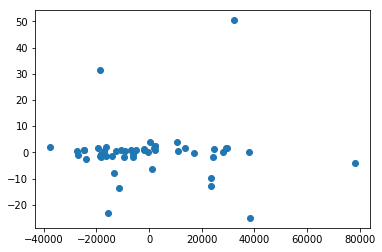

In [69]:
plt.scatter(feat_pca[:,0], feat_pca[:,1])

In [56]:
energy = features[['tempo', 'loudness']]

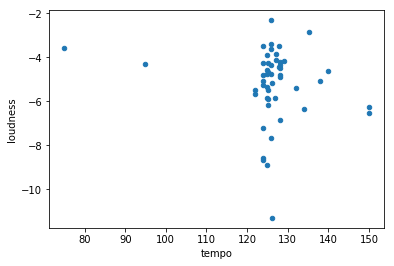

In [57]:
energy.plot.scatter(x='tempo', y='loudness')

In [58]:
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import numpy as np

In [59]:
scaled = pd.DataFrame(StandardScaler().fit_transform(energy), columns = energy.columns, index=energy.index)

In [75]:
def kdist(k, df):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(df)
    distances, indices = nbrs.kneighbors(df)
    distances = np.sort(distances[:,k-1], axis=0)
    kneedle = KneeLocator(range(0, distances.size), distances, S=1.0, curve='convex', direction='increasing')
    plt.plot(list(range(1,len(df.index)+1)), distances)
    print(distances[kneedle.knee])
    return distances[kneedle.knee]

0.7518702445900783


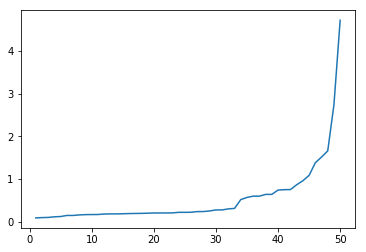

In [76]:
eps = kdist(4, scaled)

In [63]:
db = DBSCAN(eps=eps, min_samples=4).fit(scaled)

In [64]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0, -1, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)